In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

In [2]:
'''THIS PART WORKS WITH NO_RT. FILE IS 250'''

전data250_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 2 no RT/dwarf_dm_7e8_0250.txt")
dx250_noRT = 전data250_noRT[:,4]
dy250_noRT = 전data250_noRT[:,5]
dz250_noRT = 전data250_noRT[:,6]
r250_noRT = np.sqrt(dx250_noRT**2 + dy250_noRT**2 + dz250_noRT**2) # max: 7555.854234332741, closest to 7560
rad_array250_noRT = np.arange(10, 7560, 10, dtype=np.int64)
density_profile250_noRT = np.zeros(np.size(rad_array250_noRT))
i = 0
for radius_value in rad_array250_noRT:
    particles = np.where((r250_noRT > radius_value) & (r250_noRT < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile250_noRT[i] = how_many_particles / shell_volume
    i += 1
densityprof250_noRT = density_profile250_noRT / density_profile250_noRT[1]

In [3]:
# pick a halo mass, change the concentration

halo7 = NFW(9.936206e+07)
r_s7 = halo7.r_s()
c_vir7 = halo7.c_vir()
print('r_s =', r_s7)
print('c_vir =', c_vir7)

radius7 = np.arange(0.01, 7.56, 0.01) #unit: kpc

r_s = 0.6152641863869838
c_vir = 19.683273906325702


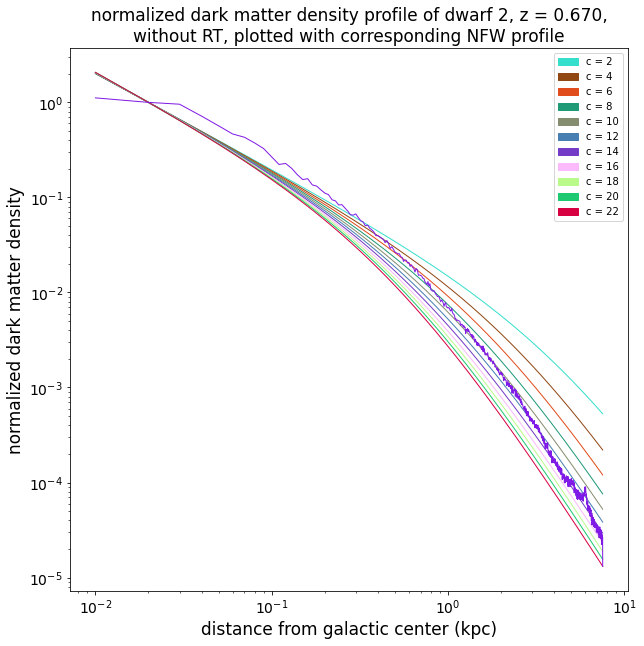

In [4]:
# best fit attempt 1

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in range(2, 24, 2):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile7 = halo7.rho(radius7, c_value)
    NFWdensityprof_noRT = density_profile7 / density_profile7[1]
    plt.plot(radius7, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(c_value))
    all_the_legends.append(each_legend)

plt.plot(radius7, densityprof250_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\nwithout RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

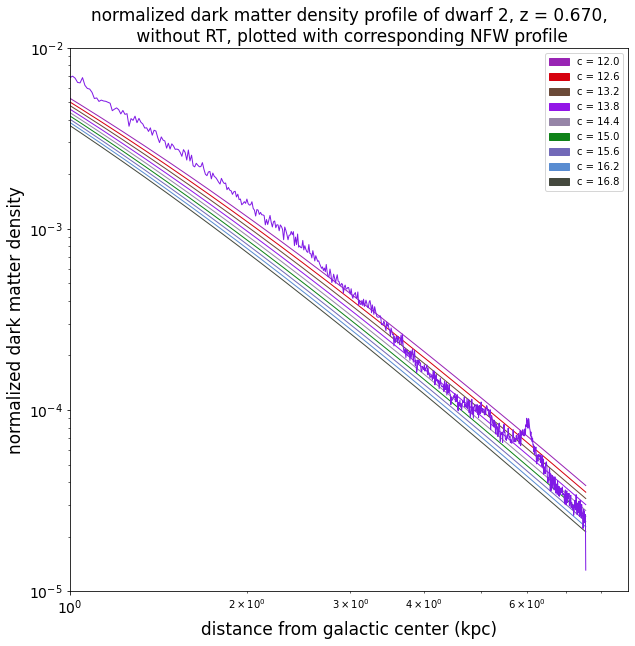

In [5]:
# best fit attempt 2

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in np.arange(12, 17, 0.6):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile7 = halo7.rho(radius7, c_value)
    NFWdensityprof_noRT = density_profile7 / density_profile7[1]
    plt.plot(radius7, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(round(c_value, 1)))
    all_the_legends.append(each_legend)

plt.plot(radius7, densityprof250_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**0,10**0.95)
plt.ylim(10**-5,10**-2)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

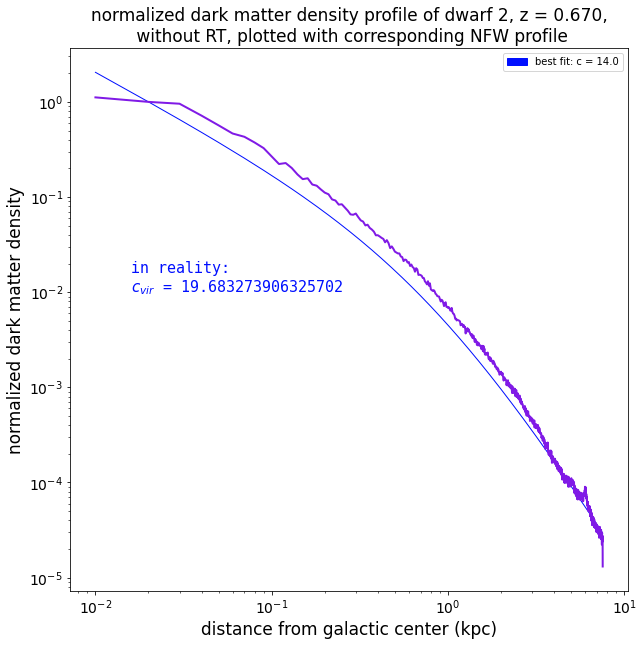

In [6]:
# plotting the best fit

plt.figure(figsize=(10,10))

density_profile7 = halo7.rho(radius7, c=14.0)
NFWdensityprof_noRT = density_profile7 / density_profile7[1]
plt.plot(radius7, NFWdensityprof_noRT, color='#000FFF', linewidth=1)
legend = mpatches.Patch(color='#000FFF', label='best fit: c = 14.0')

plt.plot(radius7, densityprof250_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=2)
    
plt.legend(handles=[legend], loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('normalized dark matter density', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.text(10**-1.8, 10**-2, '''in reality:\n$c_{vir}$ = 19.683273906325702''', \
         fontsize=15, color='#000FFF', fontfamily='monospace')

plt.show()

In [7]:
'''THIS PART WORKS WITH RT'''

전data250 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 2 RT/dwarf_dm_7e8_rt_0250.txt")
dx250 = 전data250[:,4]
dy250 = 전data250[:,5]
dz250 = 전data250[:,6]
r250 = np.sqrt(dx250**2 + dy250**2 + dz250**2) # max: 7538.892806053154, closest to 7540
rad_array250 = np.arange(10, 7540, 10, dtype=np.int64)
density_profile250 = np.zeros(np.size(rad_array250))
i = 0
for radius_value in rad_array250:
    particles = np.where((r250 > radius_value) & (r250 < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile250[i] = how_many_particles / shell_volume
    i += 1
densityprof250 = density_profile250 / density_profile250[1]

In [8]:
# pick a halo mass, change the concentration

halo8 = NFW(9.869691e+07)
r_s8 = halo8.r_s()
c_vir8 = halo8.c_vir()
print('r_s =', r_s8)
print('c_vir =', c_vir8)

radius8 = np.arange(0.01, 7.54, 0.01) #unit: kpc

r_s = 0.6135790395348271
c_vir = 19.693191919944415


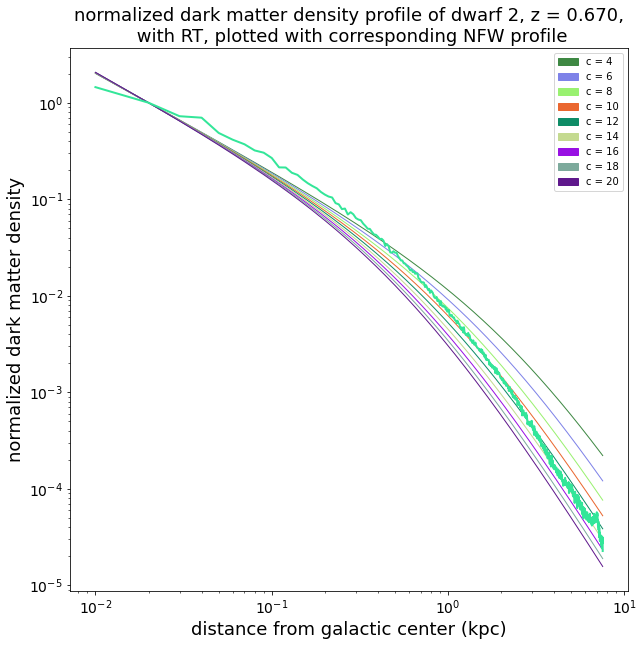

In [9]:
# best fit attempt 1

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in range(4, 22, 2):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile8 = halo8.rho(radius8, c_value)
    NFWdensityprof_noRT = density_profile8 / density_profile8[1]
    plt.plot(radius8, NFWdensityprof_noRT, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(c_value))
    all_the_legends.append(each_legend)

plt.plot(radius8, densityprof250, color=(0.2, 0.9, 0.6, 1), linewidth=2)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=18)
plt.ylabel('normalized dark matter density', fontsize=18) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=18)

plt.show()

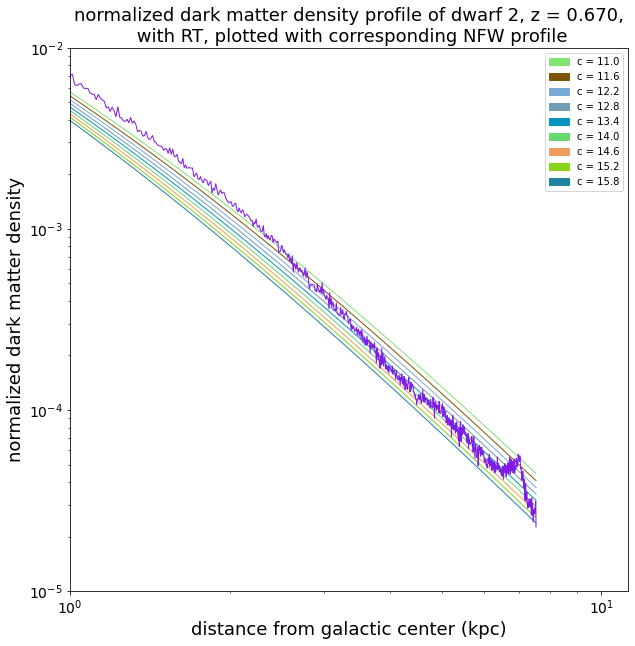

In [10]:
# best fit attempt 2

plt.figure(figsize=(10,10))

all_the_legends = []

for c_value in np.arange(11, 16, 0.6):
    r = np.random.random()
    g = np.random.random()
    b = np.random.random()
    density_profile8 = halo8.rho(radius8, c_value)
    NFWdensityprof = density_profile8 / density_profile8[1]
    plt.plot(radius8, NFWdensityprof, color=(r, g, b), linewidth=1)
    each_legend = mpatches.Patch(color=(r, g, b), label='c = ' + str(round(c_value, 1)))
    all_the_legends.append(each_legend)

plt.plot(radius8, densityprof250, color=(0.5, 0.1, 0.9, 1), linewidth=1)
    
plt.legend(handles=all_the_legends, loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=18)
plt.ylabel('normalized dark matter density', fontsize=18) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**0,10**1.05)
plt.ylim(10**-5,10**-2)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\n with RT, plotted with corresponding NFW profile' ,\
          loc='center', fontsize=18)

plt.show()

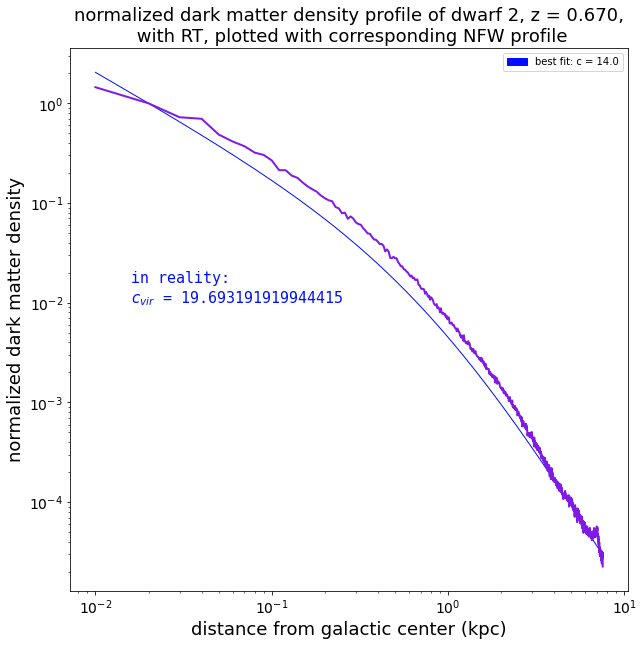

In [11]:
# plotting the best fit

plt.figure(figsize=(10,10))

density_profile8 = halo8.rho(radius8, c=14.0)
NFWdensityprof = density_profile8 / density_profile8[1]
plt.plot(radius8, NFWdensityprof, color='#000FFF', linewidth=1)
legend = mpatches.Patch(color='#000FFF', label='best fit: c = 14.0')

plt.plot(radius8, densityprof250, color=(0.5, 0.1, 0.9, 1), linewidth=2)
    
plt.legend(handles=[legend], loc='upper right')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=18)
plt.ylabel('normalized dark matter density', fontsize=18) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('normalized dark matter density profile of dwarf 2, z = 0.670,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=18)
plt.text(10**-1.8, 10**-2, '''in reality:\n$c_{vir}$ = 19.693191919944415''', \
         fontsize=15, color='#000FFF', fontfamily='monospace')

plt.show()